In [1]:
import csv
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/baddy/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
URL = "bbc-text.csv"

In [3]:
#another Method to read csv
# category=[]
# text=[]
# with open(URL,'r') as csv_read:
#     read=csv.reader(csv_read,delimiter=',')
#     next(read)
#     for i,k in read:
#         category.append(i)
#         text.append(k)
#

In [4]:
data=pd.read_csv(URL)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
data.isnull().any()

category    False
text        False
dtype: bool

In [6]:
data.isna().any()

category    False
text        False
dtype: bool

In [7]:
data[data.category.str.len()==0]

,category,text


In [8]:
data[data.text.str.len()==0]

,category,text


In [9]:
labels=data.category.unique().tolist()
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [10]:
tech_news=data[data.category =='tech'].count()[0]
tech_news

401

In [11]:
business_news=data[data.category =='business'].count()[0]
business_news

510

In [12]:
sports_news = data[data.category =='sport'].count()[0]
sports_news

511

In [13]:
entr_news=data[data.category =='entertainment'].count()[0]
entr_news

386

In [14]:
politics_news=data[data.category =='politics'].count()[0]
politics_news

417

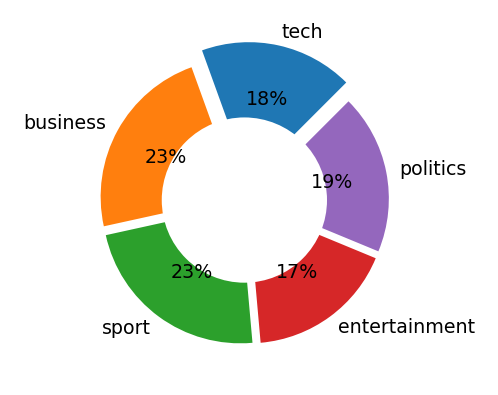

In [15]:
#pie chart visualisation of category of NEWS
size=[tech_news,business_news,sports_news,entr_news,politics_news]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.05, 0.05, 0.05,0.05]
plt.pie(size,labels=labels,textprops={'fontsize':6},startangle=45,autopct='%1.0f%%', explode=offset)

centre_circle = plt.Circle((0, 0), radius=0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

# Preprocessing + NLP

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [17]:
#Label Encoding of Catagory into respective numaric value
data.category.replace(labels,[0,1,2,3,4],inplace=True)

In [18]:
data.head()

,category,text
0,0,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,3,ocean s twelve raids box office ocean s twelve...


In [19]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "us","up", "very", "was", "we", "we'd", "we'll", "we're", "we've","will","well","shall", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you","your's" "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves","one","two","three","four","five","six","seven","ten","eight","nine","hundred","thousand","million","billion","doller","time","year","date"]

In [20]:
# continue
# hold
# remain
# occur
# means
# one
#"time" 
#"year"
#'take' 

In [21]:
var={}
var['<00v>']=0
index_=1
def cleaning(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words
def Word_Embedding(words):
    global var
    global index_
    for word in words:
        if word in var:
            continue
        else:
            var[word]=index_
            index_+=1

# Train Test Validation Split 
##### Ratio 6:2:2

In [22]:
X_train = data.text[:1335]
X_valid = data.text[1335:1780]
X_test  = data.text[1780:]

In [23]:
y_train = data.category[:1335]
y_valid = data.category[1335:1780]
y_test  = data.category[1780:]

In [24]:
X_train.head()

0    tv future in the hands of viewers with home th...
1    worldcom boss  left books alone  former worldc...
2    tigers wary of farrell  gamble  leicester say ...
3    yeading face newcastle in fa cup premiership s...
4    ocean s twelve raids box office ocean s twelve...
Name: text, dtype: object

In [25]:
y_train.head()

0    0
1    1
2    2
3    2
4    3
Name: category, dtype: int64

## Cleaning and Word Embedding

In [26]:
%%time
X_train = X_train.apply(cleaning)

X_valid = X_valid.apply(cleaning)
X_test = X_test.apply(cleaning)

CPU times: user 19.1 s, sys: 65.9 ms, total: 19.2 s
Wall time: 19.2 s


# Creating A Word Cloud

In [75]:
from PIL import Image
from wordcloud import WordCloud

In [59]:
WC_Tokens=X_train.to_list()
WC_Tokens=sum(WC_Tokens,[])

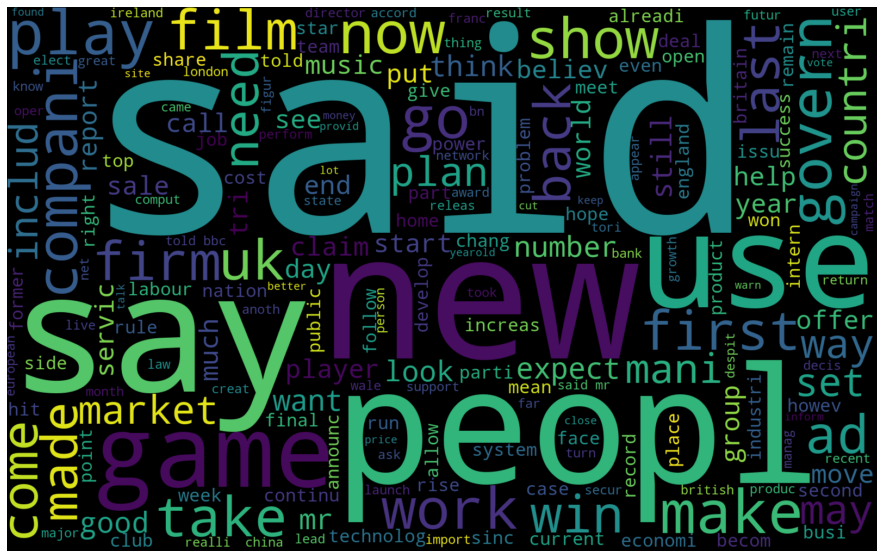

In [74]:
plt.figure( figsize=(20,10) )
word_cloud = WordCloud(width=1600, height=1000).generate(" ".join(WC_Tokens))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)

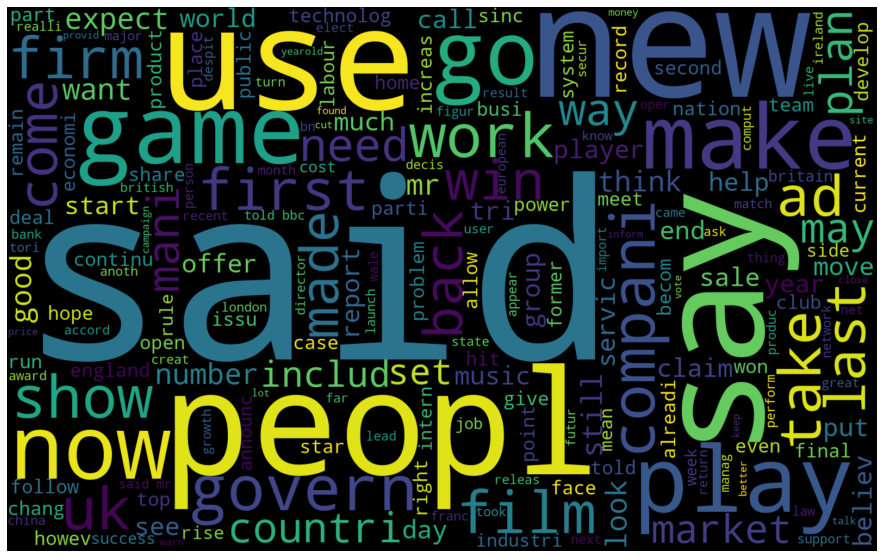

In [81]:
img=Image.open("Wordcloud/India.png")
image_mask = Image.new(mode='RGB', size=img.size, color=(255, 255, 255))
image_mask.paste(img, box=img)
rgb_array = np.array(image_mask) # converts the image object to an array
plt.figure( figsize=(20,10) )
word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=500, colormap='winter').generate(" ".join(WC_Tokens))
word_cloud = WordCloud(width=1600, height=1000)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show(word_cloud)

In [343]:
#Word Embedding only in train
X_train.apply(Word_Embedding)

0       None
1       None
2       None
3       None
4       None
        ... 
1330    None
1331    None
1332    None
1333    None
1334    None
Name: text, Length: 1335, dtype: object

In [344]:
print(f"There are total  {len(var)} in Our Words Dictonary")

There are total  17331 in Our Words Dictonary


In [345]:
#average no of Words in News article
X_train.apply(len).mean(),X_train.apply(len).max(),X_train.apply(len).min()

(221.58501872659176, 2288, 47)

# Create a Sparse Matrix for the Given Data

In [368]:
WORDS = 300

In [417]:
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [369]:
print(f'\'{X_train[50][50]}\' is present at index {var[X_train[50][50]]} in our Word Embedding')
print(f'\'{X_train[250][20]}\' is present at index {var[X_train[250][20]]} in our Word Embedding')
print(f'\'{X_train[1150][50]}\' is present at index {var[X_train[1150][50]]} in our Word Embedding')

'let' is present at index 1292 in our Word Embedding
'edelman' is present at index 7592 in our Word Embedding
'fundament' is present at index 2763 in our Word Embedding


In [430]:
%%time
train_sparse = np.zeros(shape=(X_train.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(train_sparse.shape[0]):
    for j in range(train_sparse.shape[1]):
        try:
            train_sparse[i][j]=var.get(X_train[i][j],0)
        except:
            train_sparse[i][j] = 0
    

CPU times: user 3.02 s, sys: 7.8 ms, total: 3.03 s
Wall time: 3.03 s


In [431]:
train_sparse

array([[   1,    2,    3, ...,  193,  194,  195],
       [ 247,  248,  249, ...,    0,    0,    0],
       [ 355,  356,  357, ...,    0,    0,    0],
       ...,
       [2405, 2406, 4808, ...,    0,    0,    0],
       [8717,  616,  242, ...,  451, 1334,  331],
       [2017, 1905, 2009, ...,    0,    0,    0]])

In [432]:
train_sparse[5]

array([675, 638, 406, 676, 677, 678, 675, 137, 277, 339, 679, 680, 440,
       681,  62, 682, 676,  29, 683, 684, 685, 686, 236, 687,  63, 688,
       452, 524, 137, 683,  63, 689, 690, 691, 680, 638,   5, 188, 679,
       260, 277, 680, 690, 692, 231, 693, 694, 201, 695, 696, 192, 697,
       698, 684, 188, 675, 137, 188, 679, 440, 699, 124, 121, 382,  63,
       116,  40, 188, 675,  63, 700, 701,  63, 692, 702,  96, 703, 704,
       254, 680, 440, 705,  62, 682, 676,  69, 685, 685, 706, 188, 675,
       124, 687, 683, 707, 360, 707, 277, 707, 708, 306, 425, 709, 710,
       711, 712, 713, 714, 715, 339, 679, 224, 238, 676, 548, 716, 185,
       694, 201, 695, 696, 192, 697, 698, 684, 717, 718, 719, 720, 721,
       188, 675,  63, 267, 201, 382,  63, 722,  40, 683,  89, 684, 723,
       724, 288, 186,  17, 725, 678, 675,  63,  12, 726, 288,  96,  71,
       703,  77, 204, 217, 117, 150, 395, 727, 728, 729, 730, 188, 675,
       137, 680, 731, 732, 733, 734, 570, 735, 736, 737, 738, 73

In [433]:
%%time
valid_sparse = np.zeros(shape=(X_valid.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(valid_sparse.shape[0]):
    for j in range(valid_sparse.shape[1]):
        try:
            valid_sparse[i][j]=var.get(X_valid[i][j],0)
        except:
            valid_sparse[i][j] = 0


CPU times: user 1.04 s, sys: 0 ns, total: 1.04 s
Wall time: 1.04 s


In [434]:
valid_sparse[15]

array([ 2762,  2547,  4054,  1537,   160,  2762,  2547,   127,   885,
        1797,   294,  8987,  4054,  1759,  1995,    38,  2324,  7363,
       11739,   137,   614,     0,  1995,    21,   738,  3328, 16641,
        1066, 11739,   137,   345,   118,  1933,  1975,  8518,  1303,
        1995,    63,  1466,   137,  9821,   262,   295,   297,   395,
         360,  1329,   716,   297,  9639,   160,   993,  1210,  2477,
        1451,  4382,  1518,   345,  1297,  1388,  5941,  2706,   340,
        3904,  1554,  1995,    63,   126, 11739,   137,   927,   160,
         614,    21,   392,  1359,   799,  2762,  2547,  1226,  1917,
        3916,   148,   991,   379,  1312,   909,   716,   377,  1325,
         127,   885,  1797,   185, 10499,   821,    89,  1871,   125,
        1320,  1995,  2762,  2547,  1772,   173,  4272,  2795,   441,
        2706,  1995,    79,    69,  2156,   988,   482,  1063,  1324,
        1979,   345,   118,    80,  1919,  2477,    63,   602,  1094,
        1936,  7525,

In [437]:
%%time
test_sparse = np.zeros(shape=(X_test.shape[0],300),dtype=int)
#sparse matrix filling
for i in range(test_sparse.shape[0]):
    for j in range(test_sparse.shape[1]):
        try:
            test_sparse[i][j]=var.get(X_test[i][j],0)
        except:
            test_sparse[i][j] = 0

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


In [441]:
test_sparse[2]

array([ 2017,   754, 11186,  1288,  2367,  2018,   754,    13,    65,
         848,  2561,   691,    90,  1922,   703,     5,   718,  2016,
        2017,   137,   726,  1288,     7,  1645,   951,    63,  1355,
         755,     7,   754,   680,   188,  2017,  5943,   754,   285,
         137,  2907,  1696,   169,    65,   844,  1842,  1053,  2854,
        2855,   360,   319,   754,   680,  6073,  3939,   137,   687,
        1407,  1512,   153,   128,  1220,   687,  6072,   137,   884,
        2459,   153,   683,   701,  1449,  3163,    21,    89,    79,
        1885,   734,   680,  3387,   755,     5,   718,   137,    73,
         134,  1218,  3116,  1812,    65,  5125,  1975,  1059,    90,
         185,  2327,   703,  1492,   121,    63,  5999,  6000,   137,
        2907, 11186,   364,  1165,   703,   782,  1842,  1053,   844,
        1059,    89,  1679,  4986,  1437,   137,  5997,     7,   319,
         418,  2114,   327,    17,   851,   773,   173,   703,  1059,
         773,   343,

##### Ab <i>DANGAL</i> hoga

# Model

In [442]:
import tensorflow as tf

In [496]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(var),output_dim=20,input_length=WORDS))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=36,activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [497]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 20)           346620    
_________________________________________________________________
flatten_6 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 36)                216036    
_________________________________________________________________
dropout_5 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 185       
Total params: 562,841
Trainable params: 562,841
Non-trainable params: 0
_________________________________________________________________


In [498]:
#complile Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [499]:
#hyperparamenters
num_epochs = 15
history = model.fit(train_sparse, y_train, epochs=num_epochs, validation_data=(valid_sparse, y_valid), verbose=2)

Train on 1335 samples, validate on 445 samples
Epoch 1/15
1335/1335 - 1s - loss: 1.5965 - acc: 0.2494 - val_loss: 1.5649 - val_acc: 0.2809
Epoch 2/15
1335/1335 - 0s - loss: 1.4893 - acc: 0.3393 - val_loss: 1.5034 - val_acc: 0.3483
Epoch 3/15
1335/1335 - 0s - loss: 1.3472 - acc: 0.4315 - val_loss: 1.2588 - val_acc: 0.5933
Epoch 4/15
1335/1335 - 0s - loss: 1.0210 - acc: 0.6120 - val_loss: 0.8458 - val_acc: 0.7685
Epoch 5/15
1335/1335 - 1s - loss: 0.7146 - acc: 0.7258 - val_loss: 0.5204 - val_acc: 0.9056
Epoch 6/15
1335/1335 - 0s - loss: 0.4930 - acc: 0.8075 - val_loss: 0.3510 - val_acc: 0.9258
Epoch 7/15
1335/1335 - 1s - loss: 0.4130 - acc: 0.8240 - val_loss: 0.2729 - val_acc: 0.9326
Epoch 8/15
1335/1335 - 0s - loss: 0.3589 - acc: 0.8427 - val_loss: 0.2058 - val_acc: 0.9528
Epoch 9/15
1335/1335 - 0s - loss: 0.3551 - acc: 0.8367 - val_loss: 0.1798 - val_acc: 0.9573
Epoch 10/15
1335/1335 - 0s - loss: 0.3316 - acc: 0.8442 - val_loss: 0.1573 - val_acc: 0.9596
Epoch 11/15
1335/1335 - 0s - los

# Visualizing The results

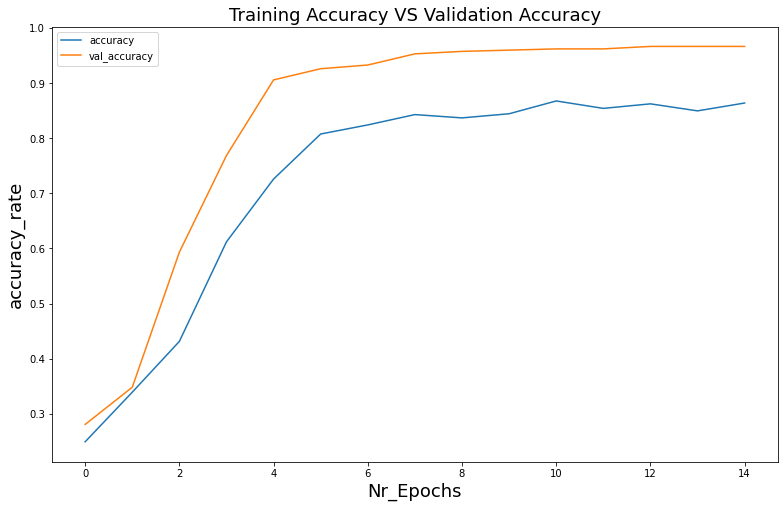

In [500]:
plt.figure(figsize=(13,8))
plt.title("Training Accuracy VS Validation Accuracy",fontsize=18)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('accuracy_rate',fontsize=18)
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [502]:
history.history

{'loss': [1.596472541580486,
  1.4893208709995398,
  1.3471716830792946,
  1.0209921099273453,
  0.7145517270216781,
  0.4929852708002155,
  0.4130162413870351,
  0.35888747680053285,
  0.35508534200629044,
  0.33162129155259007,
  0.27889838917425064,
  0.2917121221510212,
  0.26797611225633583,
  0.2719115487310324,
  0.27383613088604214],
 'acc': [0.2494382,
  0.33932585,
  0.43146068,
  0.611985,
  0.7258427,
  0.80749065,
  0.82397,
  0.8426966,
  0.83670413,
  0.84419477,
  0.8674157,
  0.85393256,
  0.8621723,
  0.8494382,
  0.8636704],
 'val_loss': [1.5649092516202605,
  1.5034011315763667,
  1.2588035637073303,
  0.845766062281105,
  0.520407046226973,
  0.3509769410899516,
  0.2728614873430702,
  0.2058411549651221,
  0.1798205301667867,
  0.15726840440811735,
  0.1354687757873803,
  0.1370135097858611,
  0.11943062754829278,
  0.11559001552254966,
  0.11001362029588624],
 'val_acc': [0.28089887,
  0.3483146,
  0.59325844,
  0.7685393,
  0.90561795,
  0.9258427,
  0.9325843,


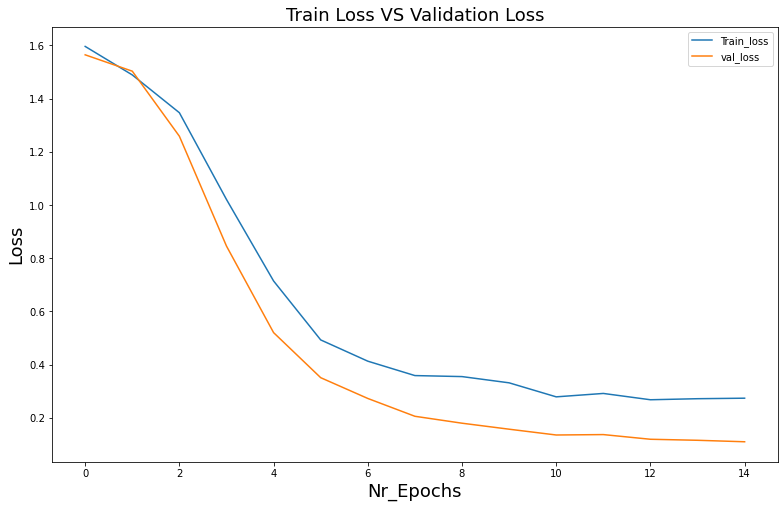

In [504]:
plt.figure(figsize=(13,8))
plt.title("Train Loss VS Validation Loss",fontsize=18)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Nr_Epochs",fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(['Train_loss', 'val_loss'])
plt.show()

<code>
    Observation :
    A- (Nr_epochs = 10)
    1- By Adding Dropout Layer Train Accuracy decrease to 87 % which was 100%
    2- By Adding Dropout Layer Validation Accuracy remain to 95%
    3- This Signify that Our Model is Performing better in Validation Data which is Good 
        Result
    
    B- By increasing Epoch to 15 from 10 
        Both Train Accuracy and  Validation Accuracy increases by 2%
    </code>